In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import datasets
import math
from mnist import MNIST

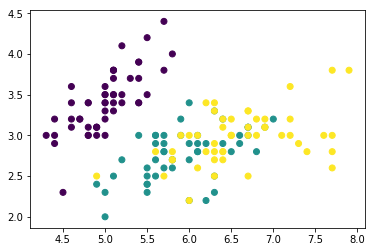

In [3]:
iris = datasets.load_iris()
X = iris.data[:,:2] #First two features of iris dataset
Y = iris.target
plt.scatter(X[:,0],X[:,1],c = Y)
plt.show()

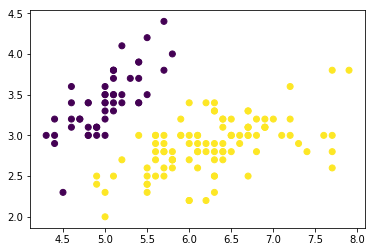

In [4]:
Y = (Y!=0) * 1
plt.scatter(X[:,0],X[:,1],c = Y)
plt.show()

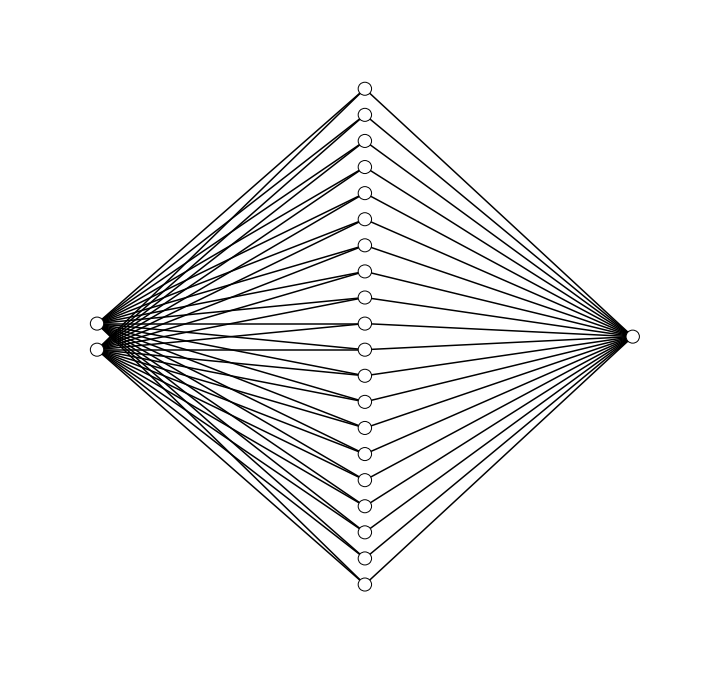

In [5]:
# Neural net visualization taken from https://gist.github.com/craffel/2d727968c3aaebd10359 

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)
                
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [2, 20, 1])

In [6]:
def activation(x,derivative=False):
    if derivative:
        return 1/2*(1-np.power(x,2))
    return (np.tanh(x)+1) / 2

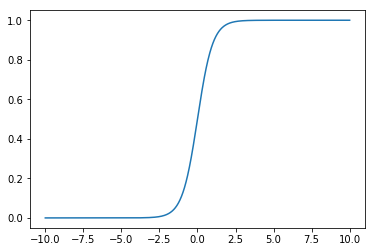

In [7]:
_X = np.linspace(-10,10,1000)
_Y = activation(_X)
plt.plot(_X,_Y)
plt.show()

In [8]:
print(X.shape)
Y = np.array(Y)[:,np.newaxis]
print(Y.shape)

(150, 2)
(150, 1)


In [9]:
def loss_function(hx,y,derivative=False):
    if derivative:
        return -(y-hx)
    return np.sum(np.power(hx-y,2)) / 2

In [33]:
def gradient_descent(X,Y,hidden_layer_num,output_layer_num,learning_rate=0.3,iterations=1000):
    # X: m x n where n = number of features
    # Y: m x c where c = number of classes for classification
    m = X.shape[0]
    n = X.shape[1]
    # Change X to m x (n+1) to add a bias node
    X = np.hstack((np.ones((m,1)),X))
    
    #Initialize randomly between -1 and 1, and add bias
    # (n+1) x h where h = number of neurons in hidden layer
    input_to_hidden_weights = np.random.random((n+1,hidden_layer_num))*2 -1
    
    # (h+1) x c
    hidden_to_output_weights = np.random.random((hidden_layer_num+1,output_layer_num))*2-1
    losses = []
    for i in range(iterations):
        
        delta_hidden = np.zeros((hidden_layer_num+1,1))
        delta_input = np.zeros((n+1,1))
        
        # Forward pass to compute values of X
        hidden_X = activation(np.dot(X,input_to_hidden_weights)) # m x h
        hidden_X = np.hstack((np.ones((m,1)),hidden_X)) # m x (h+1) for bias neuron
        output_X = activation(np.dot(hidden_X,hidden_to_output_weights)) # m x c
        
        # Calculate loss
        loss = loss_function(output_X,Y)
        print("Iteration #{0} -- Loss: {1}".format(i,loss))
        losses.append(loss)
        
        # Backpropagation
        delta_hidden_to_output = (loss_function(output_X,Y,derivative=True)*activation(output_X,derivative=True)) # m x c
        delta_input_to_hidden = np.dot(delta_hidden_to_output, hidden_to_output_weights[1:,:].T) # m x c . c x h = m x h
        delta_input_to_hidden = delta_input_to_hidden * activation(hidden_X[:,1:], derivative=True) # m x h
        
        #Calculate gradient and descend
        gradient_hidden_to_output_weights = delta_hidden_to_output[:,np.newaxis,:] * hidden_X[:,:,np.newaxis] # m x h+1 x c
        gradient_input_to_hidden_weights = delta_input_to_hidden[:,np.newaxis,:] * X[:,:,np.newaxis] # m x n+1 x h
        
        hidden_to_output_weights -= np.average(gradient_hidden_to_output_weights,axis=0) * learning_rate
        input_to_hidden_weights -= np.average(gradient_input_to_hidden_weights,axis=0) * learning_rate
        
    return (input_to_hidden_weights,hidden_to_output_weights,losses)

(input_to_hidden_weights,hidden_to_output_weights,losses) = gradient_descent(X,Y,5,1)

Iteration #0 -- Loss: 19.366336479724392
Iteration #1 -- Loss: 19.10102044434333
Iteration #2 -- Loss: 18.845036568677575
Iteration #3 -- Loss: 18.60107073987983
Iteration #4 -- Loss: 18.371043026726714
Iteration #5 -- Loss: 18.1561594346735
Iteration #6 -- Loss: 17.95704616136736
Iteration #7 -- Loss: 17.7739063057156
Iteration #8 -- Loss: 17.60665364299214
Iteration #9 -- Loss: 17.45500331185675
Iteration #10 -- Loss: 17.318520793035518
Iteration #11 -- Loss: 17.196642095199042
Iteration #12 -- Loss: 17.088680387508987
Iteration #13 -- Loss: 16.993831180779583
Iteration #14 -- Loss: 16.911183131870338
Iteration #15 -- Loss: 16.839736865760404
Iteration #16 -- Loss: 16.778430857770278
Iteration #17 -- Loss: 16.726171569867592
Iteration #18 -- Loss: 16.681864457977944
Iteration #19 -- Loss: 16.644442777760343
Iteration #20 -- Loss: 16.612891921687037
Iteration #21 -- Loss: 16.58626799312838
Iteration #22 -- Loss: 16.563710232696415
Iteration #23 -- Loss: 16.544447626791793
Iteration #2

Iteration #689 -- Loss: 3.1234195772272786
Iteration #690 -- Loss: 3.117748717524405
Iteration #691 -- Loss: 3.1120977615400918
Iteration #692 -- Loss: 3.1064666957851514
Iteration #693 -- Loss: 3.10085550617313
Iteration #694 -- Loss: 3.095264177993741
Iteration #695 -- Loss: 3.089692695887587
Iteration #696 -- Loss: 3.084141043822312
Iteration #697 -- Loss: 3.078609205070034
Iteration #698 -- Loss: 3.0730971621861194
Iteration #699 -- Loss: 3.0676048969892498
Iteration #700 -- Loss: 3.0621323905428355
Iteration #701 -- Loss: 3.05667962313766
Iteration #702 -- Loss: 3.051246574275817
Iteration #703 -- Loss: 3.0458332226558937
Iteration #704 -- Loss: 3.040439546159405
Iteration #705 -- Loss: 3.0350655218384013
Iteration #706 -- Loss: 3.029711125904301
Iteration #707 -- Loss: 3.0243763337179033
Iteration #708 -- Loss: 3.0190611197804875
Iteration #709 -- Loss: 3.013765457726122
Iteration #710 -- Loss: 3.008489320315028
Iteration #711 -- Loss: 3.003232679428005
Iteration #712 -- Loss: 2.

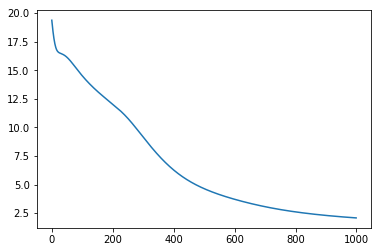

In [34]:
plt.plot(losses)

In [35]:
def forward_pass(X,input_to_hidden_weights,hidden_to_output_weights):
    m = X.shape[0]
    X_bias = np.hstack((np.ones((m,1)),X))
    hidden_X = activation(np.dot(X_bias,input_to_hidden_weights)) # m x h
    hidden_X = np.hstack((np.ones((m,1)),hidden_X)) # m x (h+1) for bias neuron
    output_X = activation(np.dot(hidden_X,hidden_to_output_weights))
    return output_X

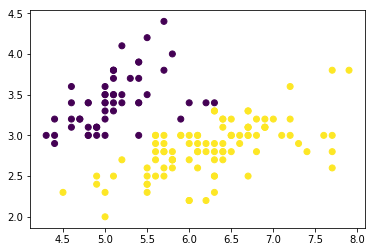

Actual


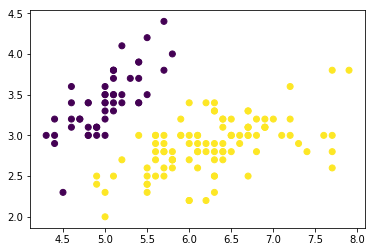

In [36]:
output_X = forward_pass(X,input_to_hidden_weights,hidden_to_output_weights)
Y_pred = np.rint(output_X[:,0])
plt.scatter(X[:,0],X[:,1],c = Y_pred)
plt.show()
print("Actual")
plt.scatter(X[:,0],X[:,1],c = Y[:,0])
plt.show()

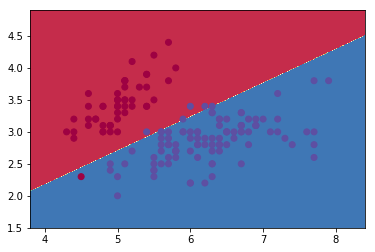

In [37]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
output_xx = forward_pass(np.c_[xx.ravel(), yy.ravel()],input_to_hidden_weights,hidden_to_output_weights)
output_xx[output_xx < 0.5] = 0
output_xx[output_xx >= 0.5] = 1
output_xx = np.rint(output_xx.reshape(xx.shape))
# Plot the contour and training examples
plt.contourf(xx, yy, output_xx, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=Y[:,0], cmap=plt.cm.Spectral)

In [ ]:
def digit_vector(digit):
    v = np.zeros((10))
    v[digit] = 1
    return v

In [83]:
mndata = MNIST()
images, labels = mndata.load_training()
labels_train = [digit_vector(x) for x in labels]
labels_train = np.array(labels_train)
images = np.array(images)


In [84]:
images_train = images[:40000]
images_test = images[40000:]
labels_train = labels_train[:40000]
labels_test = labels[40000:]

In [76]:
def stochastic_gradient_descent(X,Y,hidden_layer_num,output_layer_num,learning_rate=0.3,iterations=1000,batchsize=1000):
    # X: m x n where n = number of features
    # Y: m x c where c = number of classes for classification
    m = X.shape[0]
    n = X.shape[1]
    # Change X to m x (n+1) to add a bias node
    X = np.hstack((np.ones((m,1)),X))
    
    batches = m//batchsize
    if m%batchsize:
        batches+=1
    print(batches)
    #Initialize randomly between -1 and 1, and add bias
    # (n+1) x h where h = number of neurons in hidden layer
    input_to_hidden_weights = np.random.random((n+1,hidden_layer_num))*2 -1
    
    # (h+1) x c
    hidden_to_output_weights = np.random.random((hidden_layer_num+1,output_layer_num))*2-1
    losses = []
    for i in range(iterations):
        for j in range(batches):
            if j == batches-1:
                X_batch = X[j*batchsize:]
                Y_batch = Y[j*batchsize:]
            else:
                X_batch = X[j*batchsize:(j+1)*(batchsize)]
                Y_batch = Y[j*batchsize:(j+1)*(batchsize)]
            delta_hidden = np.zeros((hidden_layer_num+1,1))
            delta_input = np.zeros((n+1,1))

            # Forward pass to compute values of X
            hidden_X = activation(np.dot(X_batch,input_to_hidden_weights)) # m x h
            hidden_X = np.hstack((np.ones((X_batch.shape[0],1)),hidden_X)) # m x (h+1) for bias neuron
            output_X = activation(np.dot(hidden_X,hidden_to_output_weights)) # m x c

            # Calculate loss
            loss = loss_function(output_X,Y_batch)
            print("Iteration-Batch #{0}-{1} -- Loss: {2}".format(i,j,loss))
            losses.append(loss)

            # Backpropagation
            delta_hidden_to_output = (loss_function(output_X,Y_batch,derivative=True)*activation(output_X,derivative=True)) # m x c
            delta_input_to_hidden = np.dot(delta_hidden_to_output, hidden_to_output_weights[1:,:].T) # m x c . c x h = m x h
            delta_input_to_hidden = delta_input_to_hidden * activation(hidden_X[:,1:], derivative=True) # m x h

            #Calculate gradient and descend
            gradient_hidden_to_output_weights = delta_hidden_to_output[:,np.newaxis,:] * hidden_X[:,:,np.newaxis] # m x h+1 x c
            gradient_input_to_hidden_weights = delta_input_to_hidden[:,np.newaxis,:] * X_batch[:,:,np.newaxis] # m x n+1 x h

            hidden_to_output_weights -= np.average(gradient_hidden_to_output_weights,axis=0) * learning_rate
            input_to_hidden_weights -= np.average(gradient_input_to_hidden_weights,axis=0) * learning_rate
        
    return (input_to_hidden_weights,hidden_to_output_weights,losses)


In [77]:
(input_to_hidden_weights,hidden_to_output_weights,losses) = stochastic_gradient_descent(images_train,labels_train,20,10,learning_rate=1,iterations=10)

40
Iteration-Batch #0-0 -- Loss: 1559.9831713201984
Iteration-Batch #0-1 -- Loss: 924.9533608271167
Iteration-Batch #0-2 -- Loss: 527.946665681229
Iteration-Batch #0-3 -- Loss: 626.2782995400395
Iteration-Batch #0-4 -- Loss: 456.57056403507886
Iteration-Batch #0-5 -- Loss: 447.37840920632397
Iteration-Batch #0-6 -- Loss: 452.2547771577811
Iteration-Batch #0-7 -- Loss: 466.92373751011695
Iteration-Batch #0-8 -- Loss: 438.3598634019753
Iteration-Batch #0-9 -- Loss: 418.41330678387203
Iteration-Batch #0-10 -- Loss: 414.96824522747
Iteration-Batch #0-11 -- Loss: 414.4040159034158
Iteration-Batch #0-12 -- Loss: 434.36711933399226
Iteration-Batch #0-13 -- Loss: 450.38158590801834
Iteration-Batch #0-14 -- Loss: 474.0799067853362
Iteration-Batch #0-15 -- Loss: 401.5416718112874
Iteration-Batch #0-16 -- Loss: 393.11134467260234
Iteration-Batch #0-17 -- Loss: 393.4632201333076
Iteration-Batch #0-18 -- Loss: 382.8661127337591
Iteration-Batch #0-19 -- Loss: 395.44316696751173
Iteration-Batch #0-20

Iteration-Batch #4-8 -- Loss: 376.55362906009117
Iteration-Batch #4-9 -- Loss: 355.24113649452227
Iteration-Batch #4-10 -- Loss: 370.6807417297023
Iteration-Batch #4-11 -- Loss: 359.40499512434604
Iteration-Batch #4-12 -- Loss: 375.70572213706646
Iteration-Batch #4-13 -- Loss: 381.0883418754199
Iteration-Batch #4-14 -- Loss: 380.34530878385186
Iteration-Batch #4-15 -- Loss: 367.66334045336697
Iteration-Batch #4-16 -- Loss: 356.72618308941003
Iteration-Batch #4-17 -- Loss: 374.9698824643905
Iteration-Batch #4-18 -- Loss: 357.1099961817213
Iteration-Batch #4-19 -- Loss: 366.8027394749612
Iteration-Batch #4-20 -- Loss: 366.4375284452369
Iteration-Batch #4-21 -- Loss: 345.5117571571843
Iteration-Batch #4-22 -- Loss: 372.53490815721415
Iteration-Batch #4-23 -- Loss: 364.5755303441896
Iteration-Batch #4-24 -- Loss: 364.333116559534
Iteration-Batch #4-25 -- Loss: 341.97809612645915
Iteration-Batch #4-26 -- Loss: 357.83162351792663
Iteration-Batch #4-27 -- Loss: 366.0970987370646
Iteration-Bat

Iteration-Batch #8-16 -- Loss: 348.55847388478315
Iteration-Batch #8-17 -- Loss: 359.12711372124943
Iteration-Batch #8-18 -- Loss: 345.38010934658234
Iteration-Batch #8-19 -- Loss: 358.2629210887892
Iteration-Batch #8-20 -- Loss: 354.3682360498436
Iteration-Batch #8-21 -- Loss: 333.16461336283015
Iteration-Batch #8-22 -- Loss: 364.1815623518811
Iteration-Batch #8-23 -- Loss: 354.6577379753761
Iteration-Batch #8-24 -- Loss: 349.18005663904523
Iteration-Batch #8-25 -- Loss: 331.90336869706243
Iteration-Batch #8-26 -- Loss: 344.92764513045404
Iteration-Batch #8-27 -- Loss: 352.00390090773226
Iteration-Batch #8-28 -- Loss: 354.65527305681917
Iteration-Batch #8-29 -- Loss: 350.18199373656734
Iteration-Batch #8-30 -- Loss: 365.5378853250319
Iteration-Batch #8-31 -- Loss: 351.8842614649893
Iteration-Batch #8-32 -- Loss: 354.5172680187117
Iteration-Batch #8-33 -- Loss: 350.12793339723714
Iteration-Batch #8-34 -- Loss: 355.5930276319686
Iteration-Batch #8-35 -- Loss: 358.57832193645714
Iteratio

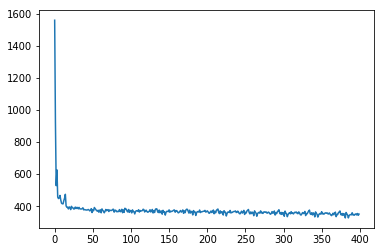

In [78]:
plt.plot(losses)

In [87]:
def predict_number(digit_probabilities):
    return np.argmax(digit_probabilities)

In [94]:
output_X = forward_pass(images_test,input_to_hidden_weights,hidden_to_output_weights)
predicted_labels = np.apply_along_axis(predict_number,axis=1,arr=output_X)
classified_correctly = np.sum(predicted_labels == labels_test)
print("Classified correctly:{0}\nClassified wrongly: {1}")

8830